In [58]:
import numpy as np
import tensorflow

In [59]:
from tensorflow.keras.datasets import cifar10

In [60]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
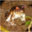

In [61]:
X_train[0]

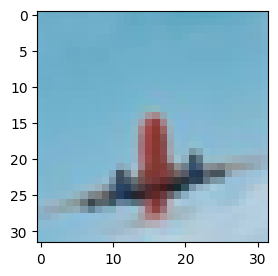

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize = (3,3))
plt.imshow(X_train[6090])
plt.show()

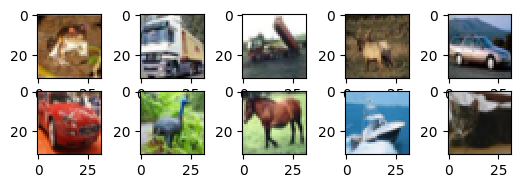

In [63]:
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
plt.show()

In [64]:
# Data Normalization

In [65]:
X_train = X_train/255
X_test = X_test/255

In [66]:
X_train.shape

(50000, 32, 32, 3)

In [67]:
# Model Building

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [132]:
Model = Sequential()
# Input Layer
Model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (32,32,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))
# Hidden layer 1
Model.add(Conv2D(64,(3,3),activation = 'relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))
# FLatten layer
Model.add(Flatten())
# Fully connected layer
Model.add(Dense(128,activation = 'relu'))
# Output Layer
Model.add(Dense(10,activation = 'softmax'))

In [133]:
Model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,106 (1.21 MB)

 Trainable params: 315,914 (1.21 MB)

 Non-trainable params: 192 (768.00 B)

In [134]:
Model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [135]:
from tensorflow.keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor = 'val_accuracy',patience=5)

In [136]:
history = Model.fit(X_train,y_train,
                    epochs = 50,
                    validation_data = (X_test,y_test),
                    callbacks = [earlyStopping])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4639 - loss: 1.5354 - val_accuracy: 0.4345 - val_loss: 1.7312
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6670 - loss: 0.9449 - val_accuracy: 0.5795 - val_loss: 1.2905
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7314 - loss: 0.7601 - val_accuracy: 0.6094 - val_loss: 1.1588
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7804 - loss: 0.6268 - val_accuracy: 0.5973 - val_loss: 1.2432
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8196 - loss: 0.5051 - val_accuracy: 0.6703 - val_loss: 1.0582
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8600 - loss: 0.3990 - val_accuracy: 0.6923 - val_loss: 1.0494
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8905 - loss: 0.3153 - val_accuracy: 0.6678 - val_loss: 1.1725
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9132 - loss: 0.2

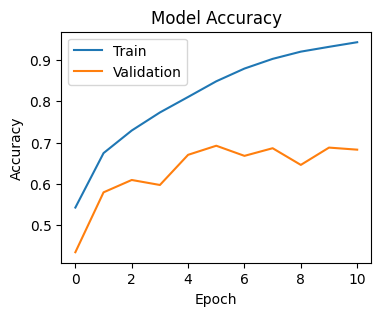

In [137]:
plt.figure(figsize = (4,3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.show()

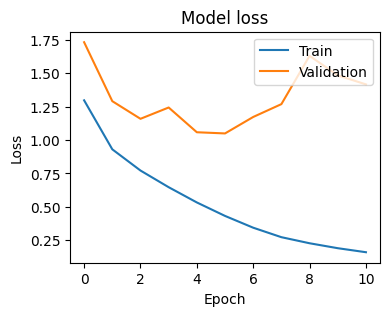

In [138]:
plt.figure(figsize=(4,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc = 'upper right')
plt.show()


In [139]:
Model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 1.3882


[1.416024923324585, 0.6827999949455261]

In [115]:
Model.save("CIFARModel.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


'ship'

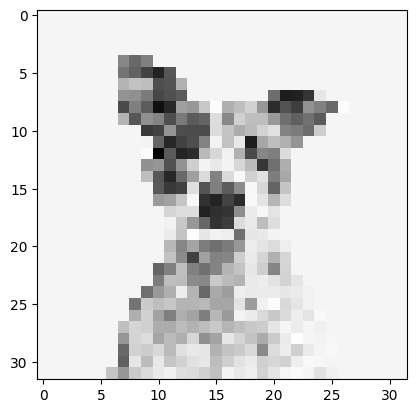

In [143]:
import cv2
category = ['airoplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
image = cv2.imread('/content/pexels-gilberto-reyes-259461-825947.jpg')
resize_image = cv2.resize(image,(32,32))
fin_img = np.expand_dims(resize_image,axis = 0)
pred = Model.predict(fin_img)
plt.imshow(resize_image)
class_name = category[np.argmax(pred)]
class_name

In [91]:
fin_img = np.expand_dims(resize_image,axis = 0)
pred = Model.predict(fin_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step


In [93]:
class_name = category[np.argmax(pred)]
class_name

'airoplane'

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
